In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 最邻近插值
def nearest_interp(img, out_dim):
    h, w, channel = img.shape
    rh, rw = out_dim[0], out_dim[1]
    if h == rh and w == rw:
        return img.copy()
    rimg = np.zeros((rh, rw, channel), np.uint8)
    sh = rh / h # 缩放倍数
    sw = rw / w
    for i in range(rh):
        for j in range(rw):
            x = int(i / sh + 0.5) 
            y = int(j / sw + 0.5)
            rimg[i,j] = img[x,y]
    return rimg

In [3]:
# 双线性插值
def bilinear_interp(img, out_dim):
    h, w, channel = img.shape
    rh, rw = out_dim[0], out_dim[1]
    if h == rh and w == rw:
        return img.copy()
    rimg = np.zeros((rh, rw, channel), np.uint8)
    sy, sx = float(h) / rh, float(w) / rw
    for i in range(channel):
        for ry in range(rh):
            for rx in range(rw):
                # +0.5处理中心重合
                y = (ry + 0.5) * sy-0.5
                x = (rx + 0.5) * sx-0.5

                y0 = int(np.floor(y))    
                y1 = min(y0 + 1 , h - 1)
                x0 = int(np.floor(x))
                x1 = min(x0 + 1, w - 1)
 
                temp0 = (x1 - x) * img[y0,x0,i] + (x - x0) * img[y0,x1,i]
                temp1 = (x1 - x) * img[y1,x0,i] + (x - x0) * img[y1,x1,i]
                rimg[ry,rx,i] = int((y1 - y) * temp0 + (y - y0) * temp1)
    return rimg    

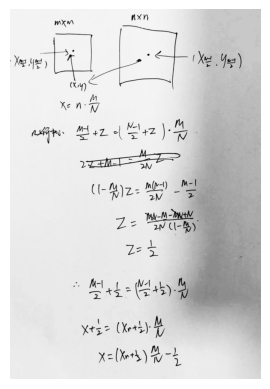

In [4]:
# 中心重合证明
pimg = cv2.imread("proof.jpg")
plt.imshow(pimg)
plt.axis('off')  # 关闭坐标轴
plt.show()

In [5]:
img = cv2.imread("lenna.png")
img_near = nearest_interp(img, (800, 800)) # r, h
img_bi = bilinear_interp(img, (800, 800))
cv2.imshow("nearest_interp", img_near)
cv2.imshow("bilinear_interp", img_bi)
cv2.imshow("Image", img)
cv2.waitKey(0)

-1